In [44]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [21]:
forest = pd.read_csv('forestfires.csv')

In [22]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [23]:
forest.shape

(517, 31)

In [24]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
month            517 non-null object
day              517 non-null object
FFMC             517 non-null float64
DMC              517 non-null float64
DC               517 non-null float64
ISI              517 non-null float64
temp             517 non-null float64
RH               517 non-null int64
wind             517 non-null float64
rain             517 non-null float64
area             517 non-null float64
dayfri           517 non-null int64
daymon           517 non-null int64
daysat           517 non-null int64
daysun           517 non-null int64
daythu           517 non-null int64
daytue           517 non-null int64
daywed           517 non-null int64
monthapr         517 non-null int64
monthaug         517 non-null int64
monthdec         517 non-null int64
monthfeb         517 non-null int64
monthjan         517 non-null int64
monthjul         517 non-null int64
monthjun     

In [25]:
forest=forest.drop(['month','day'],axis=1)

In [26]:
import matplotlib.pyplot as plt

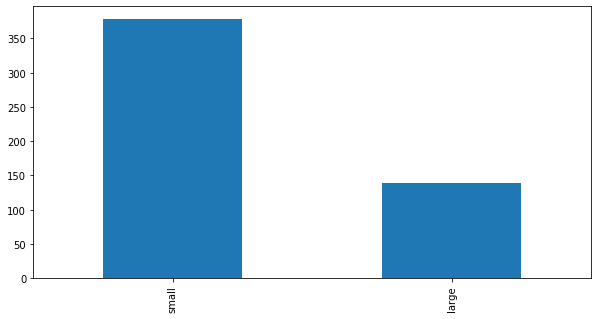

In [27]:
plt.figure(figsize=(10,5))
forest.size_category.value_counts().plot.bar();

In [28]:
from sklearn import preprocessing
lable_encoder = preprocessing.LabelEncoder()

In [29]:
forest['size_category'] = lable_encoder.fit_transform(forest.size_category)

In [30]:
forest.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [31]:
forest.shape

(517, 29)

In [32]:
f_array= forest.values

In [33]:
X = f_array[:,0:28]
Y = f_array[:,28]

In [34]:
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [35]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,...,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,-1.754024e-15,3.070830e-16,7.387171e-17,-3.865380e-17,2.005703e-16,3.362881e-16,-2.676776e-16,-2.841054e-16,-1.274502e-16,4.874674e-17,...,7.179943e-16,-1.933764e-16,-2.260174e-17,1.352883e-17,1.169277e-16,2.265542e-16,-2.596515e-16,1.443075e-16,6.253326e-16,4.024290e-16
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,...,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
25%,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
50%,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
75%,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,1.416268e+00
max,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01,2.254407e+00,...,7.512952e+00,4.984977e+00,1.604681e+01,3.893103e+00,5.423261e+00,2.928152e+00,1.604681e+01,2.271563e+01,5.785038e+00,1.416268e+00


In [36]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [37]:
from keras.layers import Dropout
from sklearn.metrics import classification_report, accuracy_score

In [39]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [40]:
model = KerasClassifier(build_fn = create_model,verbose = 0)

In [41]:
batch_size = [10,20]
epochs = [10,30]
learning_rate = [0.001,0.1]
dropout_rate = [0.0,0.1]
activation_function = ['softmax','relu']
init = ['normal']
neuron1 = [4,8]
neuron2 = [2,4]

In [42]:
param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

In [45]:
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 1/5; 1/128] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 1/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=  38.0s
[CV 2/5; 1/128] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   4.0s
[CV 3/5; 1/128] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 1/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001

[CV 1/5; 6/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.846 total time=   3.9s
[CV 2/5; 6/128] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 6/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.788 total time=   3.9s
[CV 3/5; 6/128] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 6/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.728 total time=   4.0s
[CV 4/5; 6/128] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 6/128] END

[CV 1/5; 11/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   5.1s
[CV 2/5; 11/128] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 11/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   3.8s
[CV 3/5; 11/128] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 11/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.524 total time=   3.8s
[CV 4/5; 11/128] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[

[CV 1/5; 16/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.981 total time=   4.3s
[CV 2/5; 16/128] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 16/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.779 total time=   4.6s
[CV 3/5; 16/128] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 16/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.573 total time=   3.7s
[CV 4/5; 16/128] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 16/1

[CV 1/5; 21/128] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.990 total time=   1.1s
[CV 2/5; 21/128] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 21/128] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.644 total time=   1.1s
[CV 3/5; 21/128] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 21/128] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.524 total time=   1.1s
[CV 4/5; 21/128] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 21/1

[CV 1/5; 26/128] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   1.6s
[CV 2/5; 26/128] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 2/5; 26/128] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   1.7s
[CV 3/5; 26/128] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5; 26/128] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.524 total time=   1.7s
[CV 4/5; 26/128] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[

[CV 1/5; 31/128] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=1.000 total time=   1.7s
[CV 2/5; 31/128] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 31/128] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.750 total time=   3.7s
[CV 3/5; 31/128] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 31/128] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.631 total time=   4.2s
[CV 4/5; 31/128] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 31/1

[CV 1/5; 36/128] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=1.000 total time=   2.1s
[CV 2/5; 36/128] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 2/5; 36/128] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   2.9s
[CV 3/5; 36/128] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 3/5; 36/128] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.524 total time=   2.9s
[CV 4/5; 36/128] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[

[CV 1/5; 41/128] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   3.8s
[CV 2/5; 41/128] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 41/128] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   3.5s
[CV 3/5; 41/128] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 41/128] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.524 total time=   3.3s
[CV 4/5; 41/128] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[

[CV 1/5; 46/128] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.990 total time=   2.6s
[CV 2/5; 46/128] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 46/128] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.798 total time=   3.2s
[CV 3/5; 46/128] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 46/128] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.718 total time=   3.5s
[CV 4/5; 46/128] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 46/1

[CV 1/5; 51/128] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   3.3s
[CV 2/5; 51/128] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 51/128] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   3.1s
[CV 3/5; 51/128] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 51/128] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.524 total time=   2.2s
[CV 4/5; 51/128] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[

[CV 1/5; 56/128] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.981 total time=   3.1s
[CV 2/5; 56/128] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 56/128] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.760 total time=   2.7s
[CV 3/5; 56/128] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 56/128] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.631 total time=   2.3s
[CV 4/5; 56/128] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 56/1

[CV 1/5; 61/128] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.904 total time=   4.0s
[CV 2/5; 61/128] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 61/128] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.750 total time=   3.7s
[CV 3/5; 61/128] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 61/128] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.699 total time=   3.4s
[CV 4/5; 61/128] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 61/1

[CV 1/5; 66/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   3.6s
[CV 2/5; 66/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 2/5; 66/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   3.0s
[CV 3/5; 66/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5; 66/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.524 total time=   2.9s
[CV 4/5; 66/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 66/128] EN

[CV 2/5; 71/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.750 total time=   2.8s
[CV 3/5; 71/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 71/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.524 total time=   3.2s
[CV 4/5; 71/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 71/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.728 total time=   3.5s
[CV 5/5; 71/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 71/128] END activation

[CV 3/5; 76/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.845 total time=   4.2s
[CV 4/5; 76/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 76/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.845 total time=   4.0s
[CV 5/5; 76/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 76/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.835 total time=   4.0s
[CV 1/5; 77/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 77/128] END 

[CV 4/5; 81/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.699 total time=   3.1s
[CV 5/5; 81/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 5/5; 81/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.699 total time=   3.0s
[CV 1/5; 82/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/5; 82/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   3.2s
[CV 2/5; 82/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 2/5; 82/128] EN

[CV 5/5; 86/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.699 total time=   3.4s
[CV 1/5; 87/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 87/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=1.000 total time=   3.4s
[CV 2/5; 87/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 87/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.750 total time=   1.8s
[CV 3/5; 87/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 87/128] END activation

[CV 1/5; 92/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.990 total time=   2.7s
[CV 2/5; 92/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 2/5; 92/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.769 total time=   4.7s
[CV 3/5; 92/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 3/5; 92/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.680 total time=   2.8s
[CV 4/5; 92/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 92/128] EN

[CV 2/5; 97/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   1.9s
[CV 3/5; 97/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 97/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.534 total time=   2.9s
[CV 4/5; 97/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 4/5; 97/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.680 total time=   3.1s
[CV 5/5; 97/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 5/5; 97/128] EN

[CV 3/5; 102/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.709 total time=   2.3s
[CV 4/5; 102/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 102/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.825 total time=   3.2s
[CV 5/5; 102/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 102/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.825 total time=   2.6s
[CV 1/5; 103/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 103/128] END act

[CV 4/5; 107/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.816 total time=   3.5s
[CV 5/5; 107/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 5/5; 107/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.835 total time=   3.5s
[CV 1/5; 108/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 108/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=1.000 total time=   3.0s
[CV 2/5; 108/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 2/5; 108/

[CV 5/5; 112/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.699 total time=   3.7s
[CV 1/5; 113/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 113/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   2.7s
[CV 2/5; 113/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 113/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   3.0s
[CV 3/5; 113/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 113/12

[CV 5/5; 117/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.767 total time=   3.2s
[CV 1/5; 118/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 118/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=1.000 total time=   3.0s
[CV 2/5; 118/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 118/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.798 total time=   2.6s
[CV 3/5; 118/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 118/128] END act

[CV 1/5; 123/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   3.8s
[CV 2/5; 123/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 123/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   3.8s
[CV 3/5; 123/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 123/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.524 total time=   3.6s
[CV 4/5; 123/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 4/5; 123/

[CV 2/5; 128/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.837 total time=   3.6s
[CV 3/5; 128/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 128/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.786 total time=   3.7s
[CV 4/5; 128/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 128/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.854 total time=   2.5s
[CV 5/5; 128/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 128/128] END act

In [46]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9050410747528076, using {'activation_function': 'relu', 'batch_size': 20, 'dropout_rate': 0.0, 'epochs': 30, 'init': 'normal', 'learning_rate': 0.1, 'neuron1': 4, 'neuron2': 4}
0.7208737850189209,0.16794994181639633 with: {'activation_function': 'softmax', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'normal', 'learning_rate': 0.001, 'neuron1': 4, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'normal', 'learning_rate': 0.001, 'neuron1': 4, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'normal', 'learning_rate': 0.001, 'neuron1': 8, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'normal', 'learning_rate': 0.001, 'neuron1': 8, 'neuron2': 4}
0.

In [56]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(8,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model1.add(Dropout(0.0))
    model1.add(Dense(4,kernel_initializer = 'normal',activation = 'relu'))
    model1.add(Dropout(0.0))
    model1.add(Dense(1,activation = 'sigmoid'))
    adam = Adam(lr = 0.1)
    model1.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model1

In [57]:
model1 = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 30)

In [58]:
model1.fit(X_standardized,Y)

In [59]:
Y_predict = model1.predict(X_standardized)

In [61]:
print(accuracy_score(Y,Y_predict))

0.9226305609284333
